In [1]:
suppressPackageStartupMessages({
    library(Seurat, quietly = T)

    library(dplyr, quietly = T)
    library(reshape2, quietly = T)
    
    library(ggplot2, quietly = T)
})

data_path = '/data3/hratch/norcross_abc/'

In [2]:
abc.integrated<-readRDS(paste0(data_path, 'processed/abc_annotated.RDS'))
abc.tcells<-readRDS(paste0(data_path, 'processed/abc_tcells.RDS'))

Get the cell type frequencies:

Level 1:

In [3]:
md<-abc.integrated@meta.data

In [27]:
context.counts<-dplyr::count(md, orig.ident, Cell.Type.Level1)
context.counts<-reshape2::dcast(context.counts, orig.ident ~ Cell.Type.Level1, value.var="n")
rownames(context.counts)<-context.counts$orig.ident
context.counts<-context.counts[names(context.counts) != 'orig.ident']
context.counts[is.na(context.counts)]<-0
context.counts

,Pre-B cells,Naive B cells,T cells,Natural killer cells,Conventional Dendritic cells - Group 1,Conventional Dendritic cells - Group 2,Xcr1+ Dendritic cells - Group 1,Xcr1+ Dendritic cells - Group 2,Plasmacytoid Dendritic cells,Non-classical monocytes,Macrophages,Neutrophils,Unknown
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>
UNTR,907,0,1853,20,15,15,2,10,6,10,10,5,1
ABC,13,0,2156,62,264,107,38,72,163,13,173,1,19
DT_Veh,57,27,788,23,1651,786,224,548,404,408,901,0,186
DT_ABC,873,41,3740,97,2091,970,61,120,178,411,459,167,179
aCD4_ABC,2008,1,5677,132,654,211,153,48,124,146,665,44,487


In [28]:
context.freq<-prop.table(data.matrix(context.counts),2)
context.freq

,Pre-B cells,Naive B cells,T cells,Natural killer cells,Conventional Dendritic cells - Group 1,Conventional Dendritic cells - Group 2,Xcr1+ Dendritic cells - Group 1,Xcr1+ Dendritic cells - Group 2,Plasmacytoid Dendritic cells,Non-classical monocytes,Macrophages,Neutrophils,Unknown
UNTR,0.235095905,0.00000000,0.1303644,0.05988024,0.003208556,0.007180469,0.00418410,0.01253133,0.006857143,0.01012146,0.004528986,0.023041475,0.001146789
ABC,0.003369622,0.00000000,0.1516814,0.18562874,0.056470588,0.051220680,0.07949791,0.09022556,0.186285714,0.01315789,0.078351449,0.004608295,0.021788991
DT_Veh,0.014774495,0.39130435,0.0554383,0.06886228,0.353155080,0.376256582,0.46861925,0.68671679,0.461714286,0.41295547,0.408061594,0.000000000,0.213302752
DT_ABC,0.226283048,0.59420290,0.2631209,0.29041916,0.447272727,0.464337003,0.12761506,0.15037594,0.203428571,0.41599190,0.207880435,0.769585253,0.205275229
aCD4_ABC,0.520476931,0.01449275,0.3993950,0.39520958,0.139893048,0.101005266,0.32008368,0.06015038,0.141714286,0.14777328,0.301177536,0.202764977,0.558486239


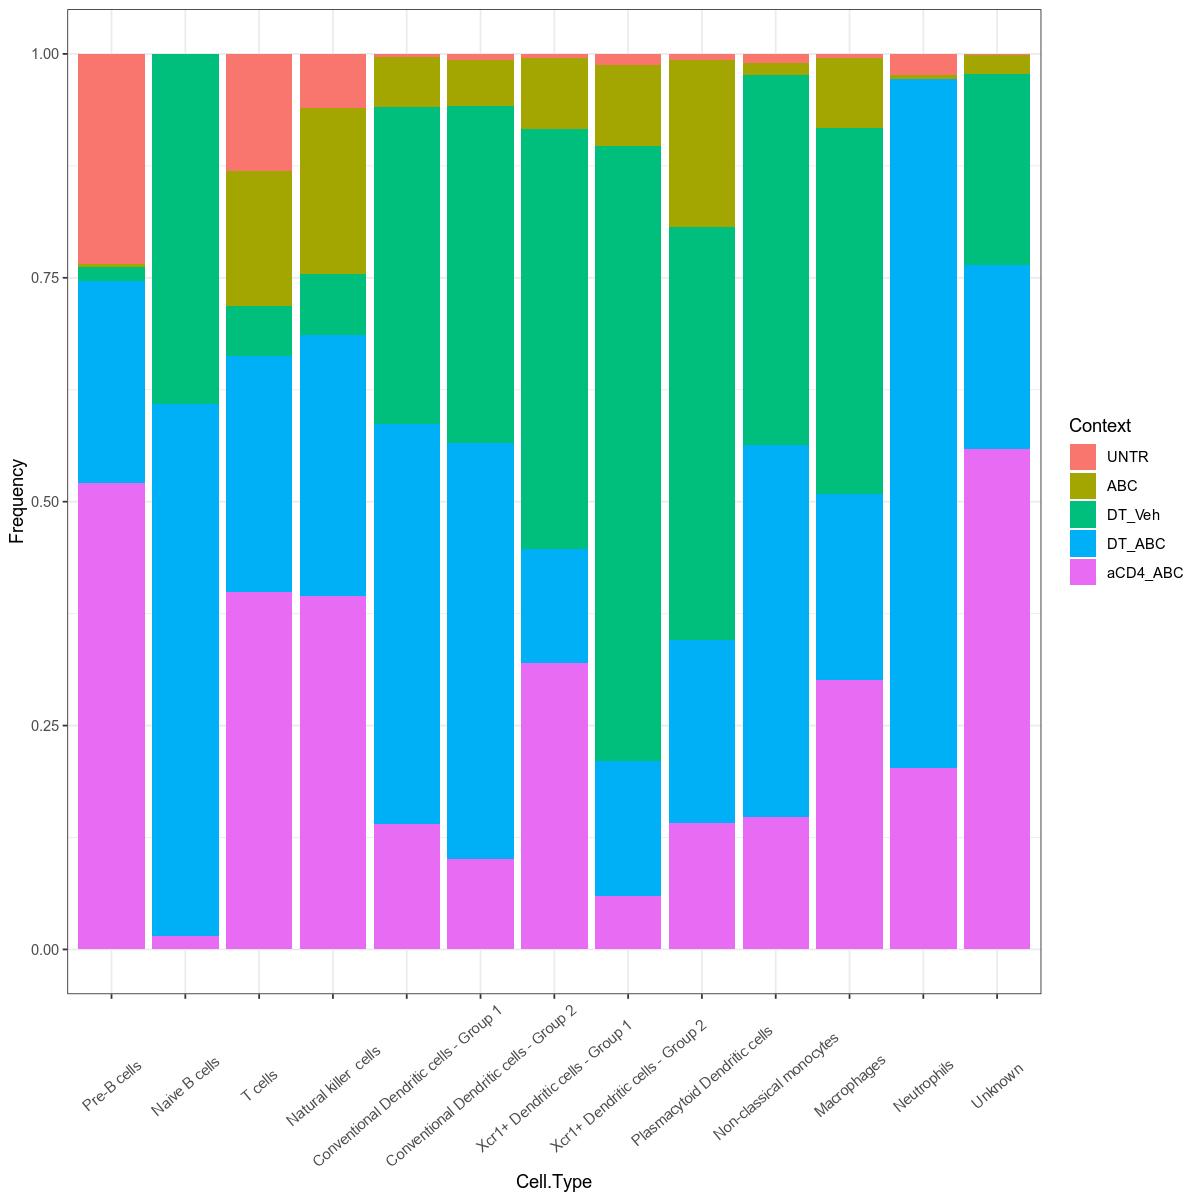

In [42]:
viz.df<-melt(context.freq)
names(viz.df)<-c('Context', 'Cell.Type', 'Frequency')

h_ = 10
w_ = 10
options(repr.plot.height=h_, repr.plot.width=w_)


g1<-ggplot(viz.df, aes(fill=Context, y=Frequency, x=Cell.Type)) + 
    geom_bar(position="stack", stat="identity") + theme_bw() + 
theme(axis.text.x = element_text(angle = 40, vjust = 0.5, hjust=0.5))
g1

for (ext in c('.svg', '.png', '.pdf')){ggsave(paste0(data_path, 'figures/', 
                                                     'celltype_level1_composition', ext), g1, 
                                             height = h_, width = w_)}

Level 2: only within total T cells

In [43]:
md<-abc.tcells@meta.data

In [45]:
context.counts<-dplyr::count(md, orig.ident, Cell.Type.Level2)
context.counts<-reshape2::dcast(context.counts, orig.ident ~ Cell.Type.Level2, value.var="n")
rownames(context.counts)<-context.counts$orig.ident
context.counts<-context.counts[names(context.counts) != 'orig.ident']
context.counts[is.na(context.counts)]<-0
context.counts

,Naive CD8+ T cells,Naive/Early Activted ISG CD8+ T cells,Early Activated CD8+ T cells,Exh precursor CD8+ T cells,Effector/Exhausted CD8+ T cells,Exhausted CD8+ T cells,Naive CD4+ T cells,Effector CD4+ T cells,Regulatory CD4+ T cells,γδ-T cells
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
UNTR,726,54,157,28,3,5,673,39,116,52
ABC,746,139,205,51,18,19,645,60,92,181
DT_Veh,217,10,57,52,60,20,221,74,21,56
DT_ABC,1102,141,207,524,391,148,771,258,52,146
aCD4_ABC,2177,164,612,1316,597,322,44,167,40,238


In [46]:
context.freq<-prop.table(data.matrix(context.counts),2)
context.freq

,Naive CD8+ T cells,Naive/Early Activted ISG CD8+ T cells,Early Activated CD8+ T cells,Exh precursor CD8+ T cells,Effector/Exhausted CD8+ T cells,Exhausted CD8+ T cells,Naive CD4+ T cells,Effector CD4+ T cells,Regulatory CD4+ T cells,γδ-T cells
UNTR,0.14613527,0.10629921,0.1268174,0.01420599,0.002806361,0.009727626,0.28589635,0.06521739,0.36137072,0.07726597
ABC,0.15016103,0.27362205,0.1655897,0.02587519,0.016838167,0.036964981,0.27400170,0.10033445,0.28660436,0.26894502
DT_Veh,0.04367955,0.01968504,0.0460420,0.02638255,0.056127222,0.038910506,0.09388275,0.12374582,0.06542056,0.08320951
DT_ABC,0.22181965,0.27755906,0.1672052,0.26585490,0.365762395,0.287937743,0.32752761,0.43143813,0.16199377,0.21693908
aCD4_ABC,0.43820451,0.32283465,0.4943457,0.66768138,0.558465856,0.626459144,0.01869159,0.27926421,0.12461059,0.35364042


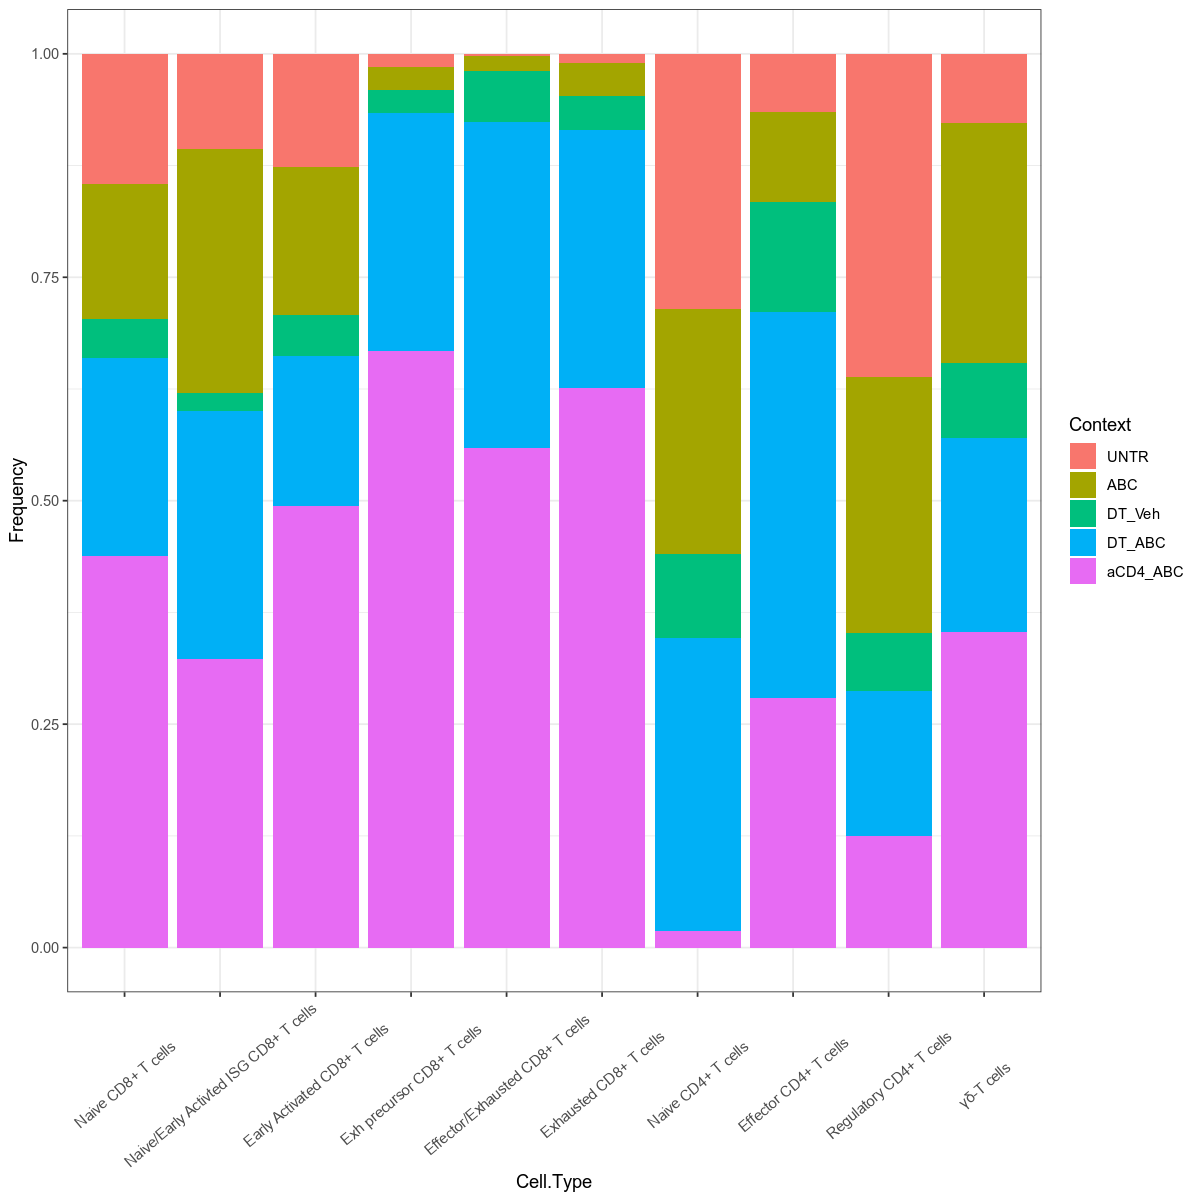

In [49]:
viz.df<-melt(context.freq)
names(viz.df)<-c('Context', 'Cell.Type', 'Frequency')

h_ = 10
w_ = 10
options(repr.plot.height=h_, repr.plot.width=w_)


g2<-ggplot(viz.df, aes(fill=Context, y=Frequency, x=Cell.Type)) + 
    geom_bar(position="stack", stat="identity") + theme_bw() + 
theme(axis.text.x = element_text(angle = 40, vjust = 0.5, hjust=0.5))
g2

suppressWarnings({
    for (ext in c('.svg', '.png', '.pdf')){ggsave(paste0(data_path, 'figures/', 
                                                     'celltype_level2_composition', ext), g2, 
                                             height = h_, width = w_)}
})